<a href="https://colab.research.google.com/github/AndreuUtkin/ML_notebooks/blob/main/LSTM_medical_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('data1.xlsx')

df

,BMI,уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7),"грудн - 0, поясн -1",грудопоясн-0 поясн-1,тип повреждения по АО (A-0 B2-1),степень повреждения тела по АО (A3-0 A4-1),Локальный кифоз гр до,высота тела п/3 до,высота тела с/3 до,высота тела з/3 до,...,"нестабильных уровней, кол-во",Многоуровневая да/нет,нестабильность 0 - нет 1 - крайн или част 2 - полная,Из них полная нестабильность (CG-2),Severity,Реоперация по поводу нестабильности,Операция из-за нестабильности + перелом конструкции,перелом металла,резорбция вокруг винтов,смежный уровень
0,35.153397,2,0,0,1.0,1,-24.0,8.9,7.0,20.9,...,0,0,0,0,0,0,0,0,0,1
1,30.846277,3,1,0,1.0,1,-3.0,16.0,8.3,21.2,...,0,0,0,0,0,0,0,0,0,1
2,NaN,0,0,0,1.0,0,-24.0,13.9,18.4,24.4,...,1,0,1,0,2,1,1,0,1,1
3,26.729927,2,0,0,1.0,1,-15.0,10.9,10.7,30.8,...,1,0,1,0,1,1,1,0,1,0
4,26.753213,3,1,0,0.0,1,-17.0,5.5,12.2,19.3,...,2,1,2,1,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,21.545091,2,0,0,1.0,1,-40.0,12.2,13.6,22.8,...,0,0,0,0,0,0,0,0,0,0
288,22.857143,3,1,0,1.0,1,0.0,17.9,18.9,21.1,...,2,1,1,0,1,1,1,1,1,0
289,19.312952,3,1,0,1.0,1,-19.0,12.3,10.3,20.6,...,0,0,0,0,0,0,0,0,0,0
290,14.692378,4,1,1,0.0,1,-3.0,20.7,14.3,23.7,...,1,0,1,0,0,0,0,0,1,0


In [ ]:
# Удаление всех строк с NaN значениями
df = df.dropna()

# Проверка на наличие NaN после удаления
print(df.isnull().sum().sum())

0


Разделим категориальные признаки

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Указываем колонки для кодирования
categorical_columns = [
    'уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)',
    'повреждение суставов 0 -нет 1 - одностороннее 2 - двустороннее',
    'повреждение ножек 0 -нет 1 - одностороннее 2 - двустороннее',
    'Декомпрессия прямая 1-передняя 2-задняя 3-1+2 4-нет 5-задняя циркулярная',
    'группы по сегментам (1-моно 2-би 3-поли)',
    'межтеловой спондилодез 0- нет 1 - mesh 2 - кейдж 3 - крошка 4 - протез тела при 1-й операции',

    'нестабильность 0 - нет 1 - крайн или част 2 - полная'
]

from sklearn.compose import make_column_transformer

# Более простой способ без префиксов
preprocessor = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False), categorical_columns),
    remainder='passthrough',
    verbose_feature_names_out=False
)

df_encoded_array = preprocessor.fit_transform(df)
feature_names = preprocessor.get_feature_names_out()
df_encoded = pd.DataFrame(df_encoded_array, columns=feature_names)

print("Новые колонки:")
print(df_encoded.columns.tolist()[:100])

Новые колонки:
['уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_1', 'уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_2', 'уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_3', 'уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_4', 'уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_5', 'уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_6', 'уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_7', 'повреждение суставов 0 -нет 1 - одностороннее 2 - двустороннее_1.0', 'повреждение суставов 0 -нет 1 - одностороннее 2 - двустороннее_2.0', 'повреждение ножек 0 -нет 1 - одностороннее 2 - двустороннее_1.0', 'повреждение ножек 0 -нет 1 - одностороннее 2 - двустороннее_2.0', 'Декомпрессия прямая 1-передняя 2-задняя 3-1+2 4-нет 5-задняя циркулярная_1', 'Декомпрессия прямая 1-передняя 2-задняя 3-1+2 4-нет 5-задняя циркулярная_2', 'Декомпрессия прямая 1-передняя 2-задняя 3-1+2 4-нет 5-задняя циркулярн

In [ ]:
feature_columns = [col for col in df_encoded.columns if col not in ['Реоперация по поводу нестабильности','Операция из-за нестабильности + перелом конструкции']]

print("Целевые переменные (осложнения):")
for target in ['Реоперация по поводу нестабильности','Операция из-за нестабильности + перелом конструкции']:
    print(f"  - {target}")

print(f"\nПризнаки (параметры пациентов): {len(feature_columns)}")
print("Примеры:", feature_columns[:10])

# Правильное разделение данных
X = df_encoded[feature_columns]  # только параметры пациентов
y = df_encoded[['Реоперация по поводу нестабильности','Операция из-за нестабильности + перелом конструкции']]   # только осложнения

Целевые переменные (осложнения):
  - Реоперация по поводу нестабильности
  - Операция из-за нестабильности + перелом конструкции

Признаки (параметры пациентов): 87
Примеры: ['уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_1', 'уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_2', 'уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_3', 'уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_4', 'уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_5', 'уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_6', 'уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_7', 'повреждение суставов 0 -нет 1 - одностороннее 2 - двустороннее_1.0', 'повреждение суставов 0 -нет 1 - одностороннее 2 - двустороннее_2.0', 'повреждение ножек 0 -нет 1 - одностороннее 2 - двустороннее_1.0']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Теперь обучим модель правильно
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [ ]:
# Убедимся, что используем правильные данные
print(f"Форма X: {X.shape}")
print(f"Форма y: {y.shape}")

Форма X: (190, 87)
Форма y: (190, 2)


In [ ]:
# Стандартизация признаков (важно для нейронных сетей)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Создание временных рядов

In [ ]:
# Проанализируем признаки с суффиксами
def analyze_features_with_suffixes(df, suffix_pattern=r'_(\d+)$'):
    """Анализирует признаки с числовыми суффиксами"""
    import re

    suffix_features = {}
    for col in df.columns:
        match = re.search(suffix_pattern, str(col))
        if match:
            base_name = re.sub(suffix_pattern, '', col)
            suffix = match.group(1)
            if base_name not in suffix_features:
                suffix_features[base_name] = []
            suffix_features[base_name].append((suffix, col))

    return suffix_features

# Анализ структуры признаков
suffix_features = analyze_features_with_suffixes(df_encoded[feature_columns])
print(f"\nНайдено групп признаков с суффиксами: {len(suffix_features)}")
for base_name, features in list(suffix_features.items())[:5]:
    print(f"  {base_name}: {len(features)} уровней")
    print(f"    Примеры: {[col for _, col in features[:3]]}")



Найдено групп признаков с суффиксами: 5
  уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7): 7 уровней
    Примеры: ['уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_1', 'уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_2', 'уровень стеноза (Th10-0 Th11-1 Th12-2 L1-3 L2-4 L3-5 L4-6 L5-7)_3']
  Декомпрессия прямая 1-передняя 2-задняя 3-1+2 4-нет 5-задняя циркулярная: 5 уровней
    Примеры: ['Декомпрессия прямая 1-передняя 2-задняя 3-1+2 4-нет 5-задняя циркулярная_1', 'Декомпрессия прямая 1-передняя 2-задняя 3-1+2 4-нет 5-задняя циркулярная_2', 'Декомпрессия прямая 1-передняя 2-задняя 3-1+2 4-нет 5-задняя циркулярная_3']
  группы по сегментам (1-моно 2-би 3-поли): 2 уровней
    Примеры: ['группы по сегментам (1-моно 2-би 3-поли)_2', 'группы по сегментам (1-моно 2-би 3-поли)_3']
  межтеловой спондилодез 0- нет 1 - mesh 2 - кейдж 3 - крошка 4 - протез тела при 1-й операции: 4 уровней
    Примеры: ['межтеловой спондилодез 0- нет 1 - mesh 2 - кей

In [ ]:
target_columns = ['Реоперация по поводу нестабильности',
                  'Операция из-за нестабильности + перелом конструкции']

# Признаки (исключая целевые)
X = df_encoded[feature_columns]
y = df_encoded[target_columns]

In [ ]:
for target in target_columns:
    positive = y[target].sum()
    percentage = positive / len(y) * 100
    print(f"{target}:")
    print(f"  Положительных случаев: {positive} ({percentage:.2f}%)")
    print(f"  Отрицательных случаев: {len(y) - positive}")

# Проверка на пересечение
both_positive = ((y[target_columns[0]] == 1) & (y[target_columns[1]] == 1)).sum()
print(f"\nПациентов с ОБОИМИ осложнениями: {both_positive}")

Реоперация по поводу нестабильности:
  Положительных случаев: 17.0 (8.95%)
  Отрицательных случаев: 173.0
Операция из-за нестабильности + перелом конструкции:
  Положительных случаев: 27.0 (14.21%)
  Отрицательных случаев: 163.0

Пациентов с ОБОИМИ осложнениями: 17


Группируем признаки по областям

In [ ]:
def group_features_by_type(features):
    """Группирует признаки по их типу"""
    groups = {
        'стеноз_уровни': [f for f in features if 'уровень стеноза' in f],
        'повреждение_суставов': [f for f in features if 'повреждение суставов' in f],
        'повреждение_ножек': [f for f in features if 'повреждение ножек' in f],
        'декомпрессия_типы': [f for f in features if 'Декомпрессия прямая' in f],
        'сегменты_группы': [f for f in features if 'группы по сегментам' in f],
        'спондилодез_типы': [f for f in features if 'межтеловой спондилодез' in f],
        'нестабильность_уровни': [f for f in features if 'нестабильность 0 - нет' in f],
        'демографические': ['BMI', 'грудн - 0, поясн -1', 'костная плотность MED (ед НU)',
                           'остеопороз 0-нет 1-да', 'ширина (Н/Сл)'],
        'анатомические': ['Локальный кифоз гр до', 'высота тела п/3 до',
                         'высота тела с/3 до', 'высота тела з/3 до',
                         'somatik kiphosis до VWA', 'somatik kiphosis после после VWA'],
        'хирургические': ['декомпрессия непрямая — 0 прямая — 1', 'декомпрессия прямая задняя',
                         'декомпрессия прямая задняя циркулярная', 'декомпрессия прямая передняя',
                         'декомпрессия прямая комбинированная', 'односторонняя фасетэктомия',
                         'двухсторонняя фасетэктомия SP', 'включение S1', 'ALIF', 'TLIF',
                         'TLIF Mesh', 'XLIF', 'задний спондилодез'],
        'стабильность': ['угол в коронарной плоскасти сразу после', 'Скоррегировано',
                        'деформация более 10 нрадусов', 'Потеря коррекции за 12 мес',
                        'нестабильность винтов да/нет', 'Subside']
    }

    # Проверим, что все признаки учтены
    all_grouped = sum([len(g) for g in groups.values()])
    print(f"Сгруппировано признаков: {all_grouped} из {len(features)}")

    return groups

Сгруппировано признаков: 55 из 87


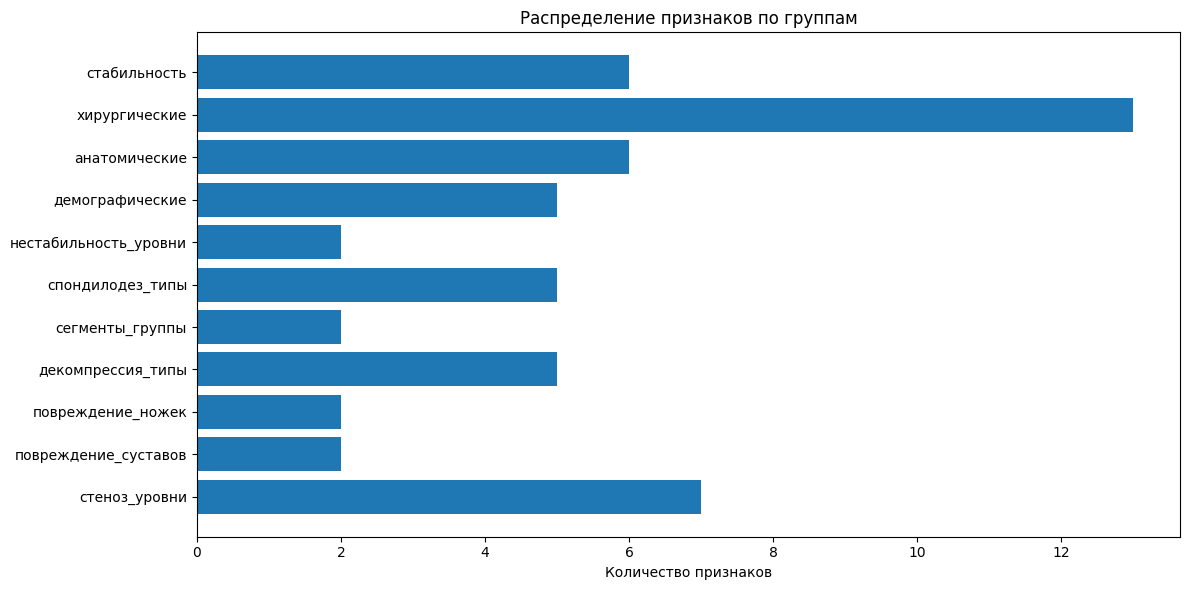

In [ ]:
feature_groups = group_features_by_type(feature_columns)

# Визуализация распределения признаков по группам
plt.figure(figsize=(12, 6))
group_names = list(feature_groups.keys())
group_sizes = [len(feature_groups[name]) for name in group_names]

plt.barh(group_names, group_sizes)
plt.xlabel('Количество признаков')
plt.title('Распределение признаков по группам')
plt.tight_layout()
plt.show()

In [ ]:
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Для LSTM нам нужно преобразовать данные в 3D формат
# Рассмотрим признаки с суффиксами как последовательности
max_sequence_length = 0
for base_name, features in suffix_features.items():
    max_sequence_length = max(max_sequence_length, len(features))

print(f"Максимальная длина последовательности (по суффиксам): {max_sequence_length}")


Максимальная длина последовательности (по суффиксам): 7


Делим признаки на последовательности

In [ ]:
# Создаем несколько входов для разных типов признаков
def prepare_lstm_inputs(X_scaled, feature_columns, feature_groups):
    """Подготавливает данные для многомерной LSTM"""

    # 1. Вход для последовательных признаков (с суффиксами)
    sequential_features = []
    for base_name, features in suffix_features.items():
        # Сортируем по суффиксу
        sorted_features = sorted(features, key=lambda x: int(x[0]) if x[0].isdigit() else float(x[0]))
        feature_indices = [feature_columns.index(col) for _, col in sorted_features]
        sequential_features.append(feature_indices)

    # 2. Вход для обычных признаков
    non_sequential_features = []
    for col in feature_columns:
        if not any(col in group for group in suffix_features.values() for _, col_name in group):
            non_sequential_features.append(feature_columns.index(col))

    print(f"Последовательных групп: {len(sequential_features)}")
    print(f"Обычных признаков: {len(non_sequential_features)}")

    return sequential_features, non_sequential_features

sequential_indices, non_seq_indices = prepare_lstm_inputs(X_scaled, feature_columns, feature_groups)


Последовательных групп: 5
Обычных признаков: 87


In [ ]:
# Создаем модель с несколькими входами
def create_multi_input_lstm(seq_features_count, non_seq_features_count,
                           max_seq_length=7, num_outputs=2):

    # Вход для последовательных данных
    seq_inputs = []
    seq_outputs = []

    for i, seq_len in enumerate(seq_features_count):
        seq_input = layers.Input(shape=(max_seq_length, 1), name=f'seq_input_{i}')
        seq_inputs.append(seq_input)

        # LSTM для каждой последовательности
        lstm_out = layers.LSTM(
            units=min(32, seq_len * 4),  # Адаптируем размер под длину последовательности
            return_sequences=False,
            dropout=0.2,
            recurrent_dropout=0.2,
            name=f'lstm_{i}'
        )(seq_input)
        seq_outputs.append(lstm_out)

    # Вход для обычных признаков
    non_seq_input = layers.Input(shape=(non_seq_features_count,), name='non_seq_input')
    seq_inputs.append(non_seq_input)

    # Dense слой для обычных признаков
    dense_non_seq = layers.Dense(32, activation='relu')(non_seq_input)
    dense_non_seq = layers.Dropout(0.1)(dense_non_seq)

    # Объединяем все выходы
    if len(seq_outputs) > 1:
        concatenated = layers.Concatenate()(seq_outputs)
    else:
        concatenated = seq_outputs[0]

    # Добавляем общие слои
    x = layers.Dense(128, activation='relu')(concatenated)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)



    # Выходной слой
    outputs = layers.Dense(num_outputs, activation='sigmoid', name='output')(x)

    # Создаем модель
    model = keras.Model(inputs=seq_inputs, outputs=outputs)

    return model

# Создаем модель
seq_features_count = [len(indices) for indices in sequential_indices]
non_seq_features_count = len(non_seq_indices)

model = create_multi_input_lstm(
    seq_features_count=seq_features_count,
    non_seq_features_count=non_seq_features_count,
    max_seq_length=max_sequence_length,
    num_outputs=2
)

# Компилируем модель
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc'),
        keras.metrics.AUC(name='auc_pr', curve='PR')  # Precision-Recall AUC
    ]
)

# Покажем архитектуру
model.summary()



Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ seq_input_0         │ (None, 7, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ seq_input_1         │ (None, 7, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ seq_input_2         │ (None, 7, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ seq_input_3         │ (None, 7, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ seq_input_4         │ (None, 7, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_0 (LSTM)       │ (None, 28)        │      3,360 │ seq_input_0[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 20)        │      1,760 │ seq_input_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 8)         │        320 │ seq_input_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 16)        │      1,152 │ seq_input_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 8)         │        320 │ seq_input_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 80)        │          0 │ lstm_0[0][0],     │
│ (Concatenate)       │                   │            │ lstm_1[0][0],     │
│                     │                   │            │ lstm_2[0][0],     │
│                     │                   │            │ lstm_3[0][0],     │
│                     │                   │            │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_84 (Dense)    │ (None, 128)       │     10,368 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_84[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_66          │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_85 (Dense)    │ (None, 64)        │      8,256 │ dropout_66[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_85[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_67          │ (None, 64)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ non_seq_input       │ (None, 87)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                 

 Total params: 26,434 (103.26 KB)

 Trainable params: 26,050 (101.76 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Компилируем модель
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc'),
        keras.metrics.AUC(name='auc_pr', curve='PR')  # Precision-Recall AUC
    ]
)

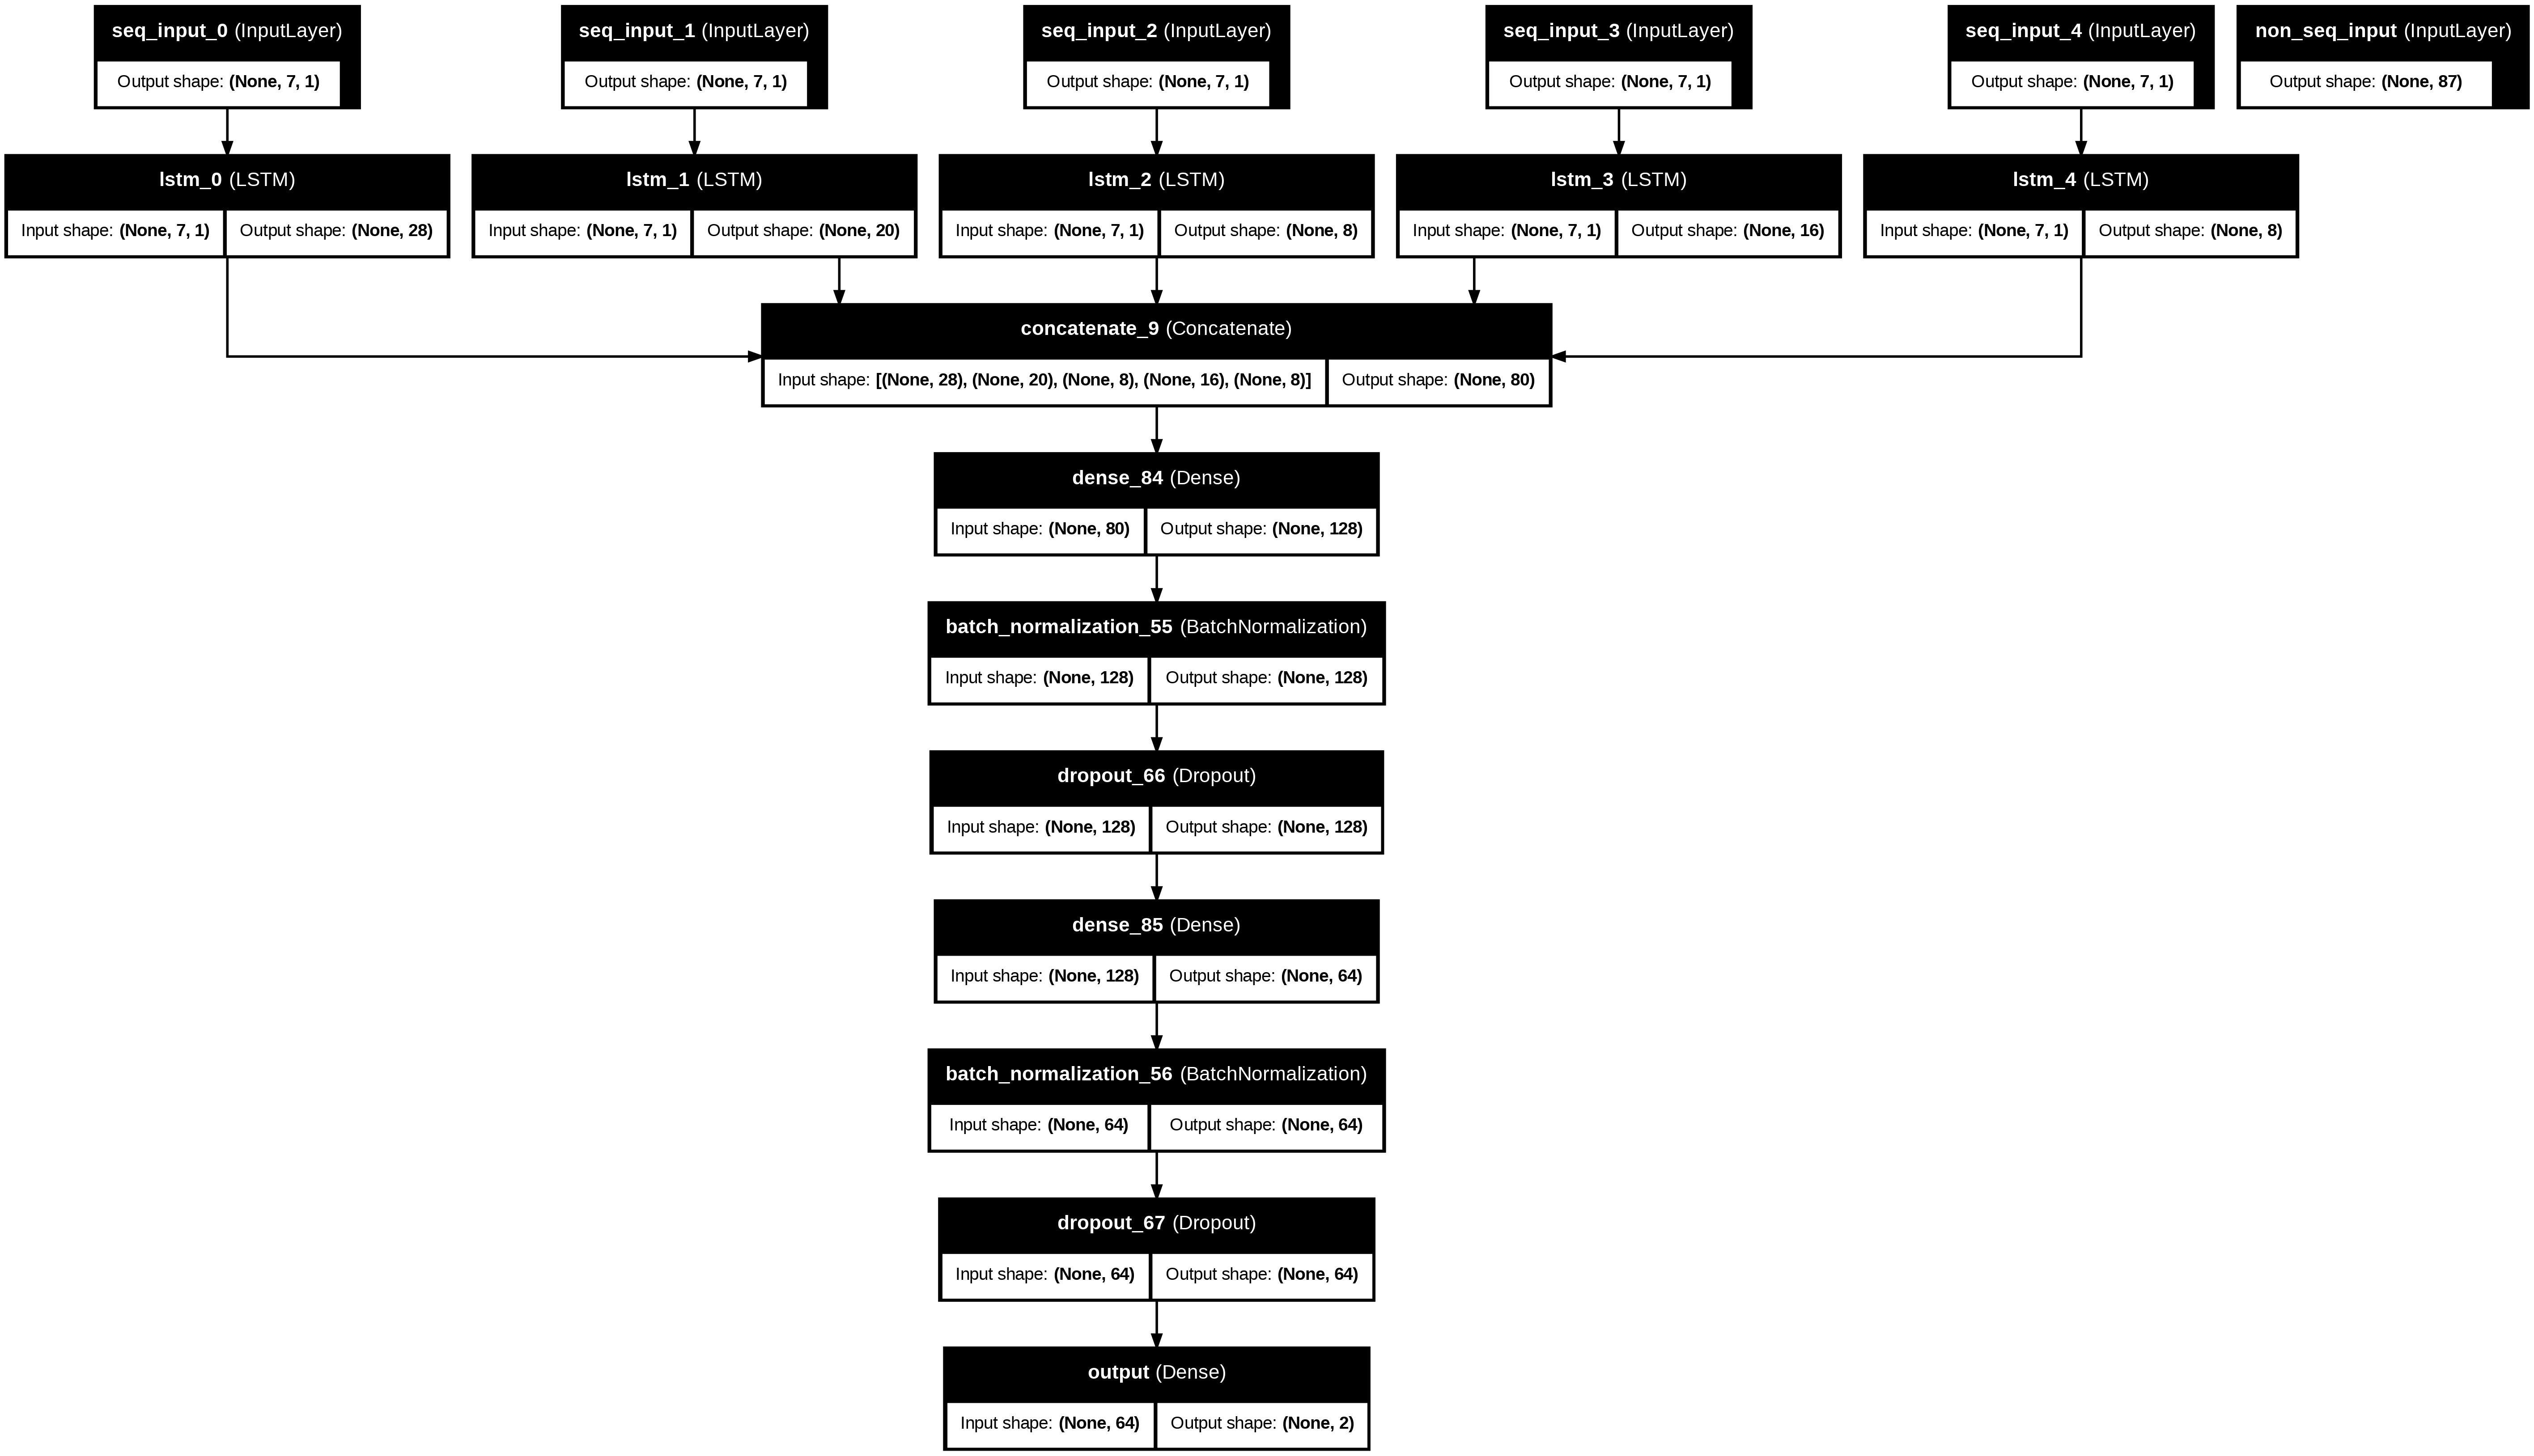

In [ ]:
# Визуализация архитектуры
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
max_seq_length = 0
for base_name, features in suffix_features.items():
    max_sequence_length = max(max_sequence_length, len(features))

print(f"\nМаксимальная длина последовательности (по суффиксам): {max_sequence_length}")


Максимальная длина последовательности (по суффиксам): 7


In [ ]:
max_sequence_length_param

NameError: name 'max_sequence_length_param' is not defined

In [ ]:
def prepare_multi_input_data(X_scaled, sequential_indices, non_seq_indices, max_seq_length_param):
    """Подготавливает данные для многомерной модели"""

    # Подготавливаем последовательные входы
    seq_inputs_data = []
    for indices in sequential_indices:
        # Создаем последовательности
        seq_data = np.zeros((X_scaled.shape[0], max_seq_length_param, 1))
        for i, idx in enumerate(indices):
            if i < max_seq_length_param:
                seq_data[:, i, 0] = X_scaled[:, idx]
        seq_inputs_data.append(seq_data)

    # Подготавливаем обычные признаки
    non_seq_data = X_scaled[:, non_seq_indices]
    seq_inputs_data.append(non_seq_data)

    return seq_inputs_data

# Подготавливаем данные (используем max_sequence_length, а не max_seq_length=0)

In [ ]:
# Разделяем данные на тренировочную и тестовую выборки
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Подготавливаем многомерные входы для тренировочных данных
X_train_list = prepare_multi_input_data(X_train_scaled, sequential_indices, non_seq_indices, max_sequence_length)

# Подготавливаем многомерные входы для тестовых данных
X_test_list = prepare_multi_input_data(X_test_scaled, sequential_indices, non_seq_indices, max_sequence_length)

print(f"Размеры обучающих данных:")
for i, data in enumerate(X_train_list):
    print(f"  Вход {i}: {data.shape}")
print(f"y_train: {y_train.shape}")

Размеры обучающих данных:
  Вход 0: (152, 7, 1)
  Вход 1: (152, 7, 1)
  Вход 2: (152, 7, 1)
  Вход 3: (152, 7, 1)
  Вход 4: (152, 7, 1)
  Вход 5: (152, 87)
y_train: (152, 2)


*******************************************

In [ ]:
# Callbacks для улучшения обучения
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=15,
    min_lr=0.00001,
    verbose=1
)



history = model.fit(
    X_train_scaled, y_train_nn,
    epochs=200,
    batch_size=32,
    validation_data=(X_test_scaled, y_test_nn),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 222ms/step - accuracy: 0.5678 - loss: 0.8866 - precision: 0.1851 - recall: 0.6522 - val_accuracy: 0.2566 - val_loss: 0.6637 - val_precision: 0.2045 - val_recall: 0.7714 - learning_rate: 5.0000e-04
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5824 - loss: 0.8170 - precision: 0.1394 - recall: 0.6969 - val_accuracy: 0.2961 - val_loss: 0.6570 - val_precision: 0.2044 - val_recall: 0.8000 - learning_rate: 5.0000e-04
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5580 - loss: 0.7410 - precision: 0.1547 - recall: 0.8154 - val_accuracy: 0.3684 - val_loss: 0.6517 - val_precision: 0.2263 - val_recall: 0.8857 - learning_rate: 5.0000e-04
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6046 - loss: 0.6468 - precision: 0.2499 - recall: 0.8667 - val_accuracy: 0.4211 - val_loss: 0.6393 - val_precision: 0.2612 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc

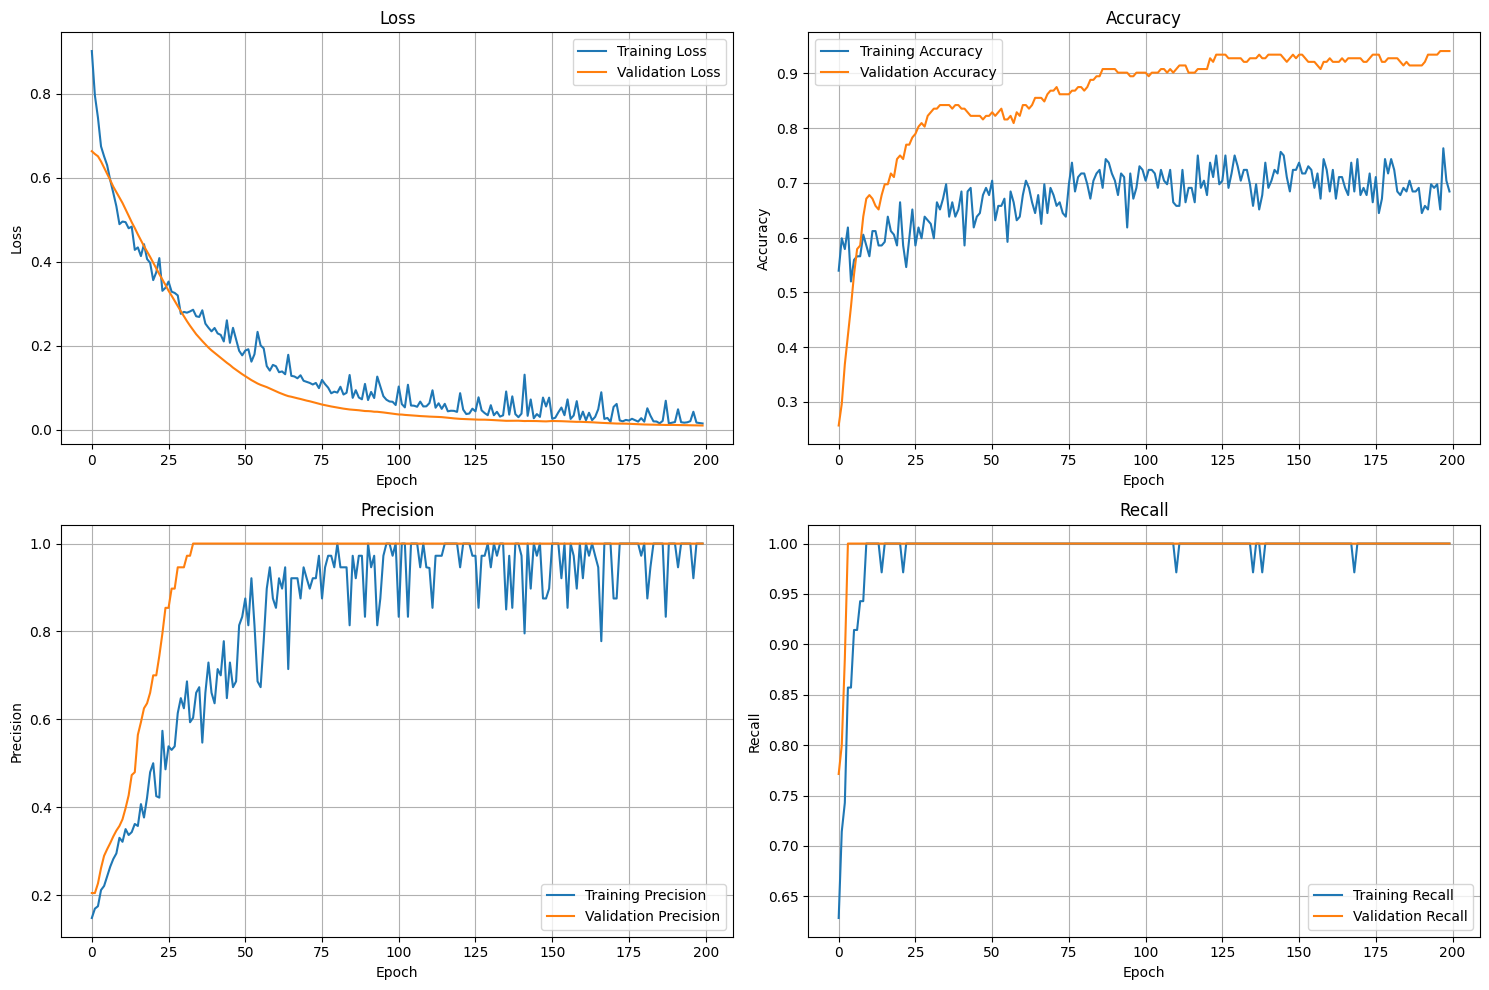

In [ ]:
def plot_training_history(history):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Loss
    axes[0, 0].plot(history.history['loss'], label='Training Loss')
    axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 0].set_title('Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Accuracy
    axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0, 1].set_title('Accuracy')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Precision
    axes[1, 0].plot(history.history['precision'], label='Training Precision')
    axes[1, 0].plot(history.history['val_precision'], label='Validation Precision')
    axes[1, 0].set_title('Precision')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Recall
    axes[1, 1].plot(history.history['recall'], label='Training Recall')
    axes[1, 1].plot(history.history['val_recall'], label='Validation Recall')
    axes[1, 1].set_title('Recall')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [ ]:
results = model.evaluate(X_test_scaled, y_test_nn, verbose=0)


print(f"Loss: {results[0]:.4f}")
print(f"Accuracy: {results[1]:.4f}")
print(f"Precision: {results[2]:.4f}")
print(f"Recall: {results[3]:.4f}")

Loss: 0.0105
Accuracy: 0.9408
Precision: 1.0000
Recall: 1.0000



КОМПАКТНЫЕ ГРАФИКИ ВАЖНОСТИ ПРИЗНАКОВ

Генерируем графики...
Используем исправленные данные важности...


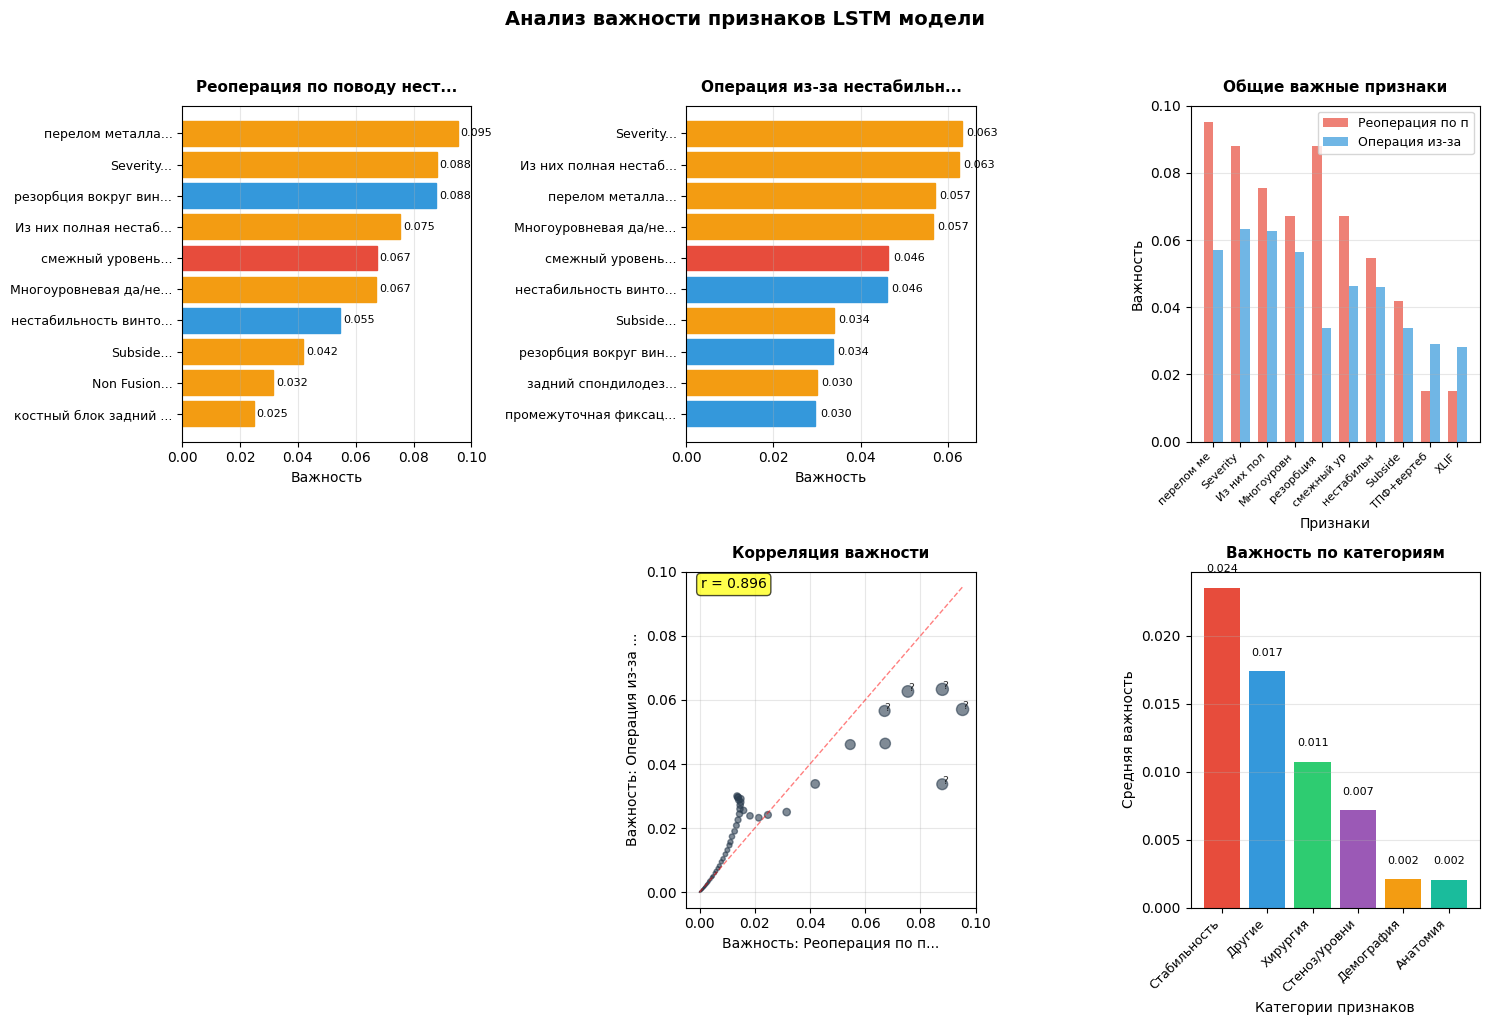

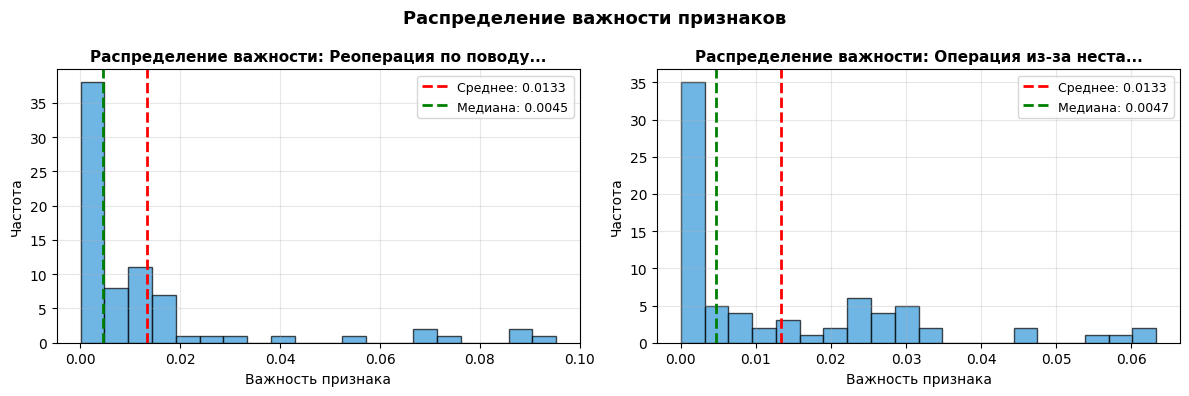

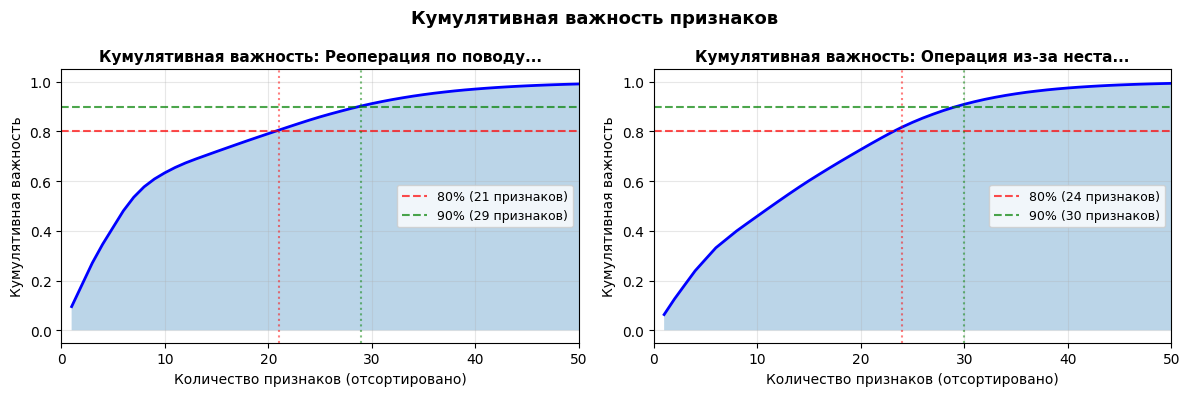


ПРОСТОЙ ГРАФИК: ТОП-20 САМЫХ ВАЖНЫХ ПРИЗНАКОВ


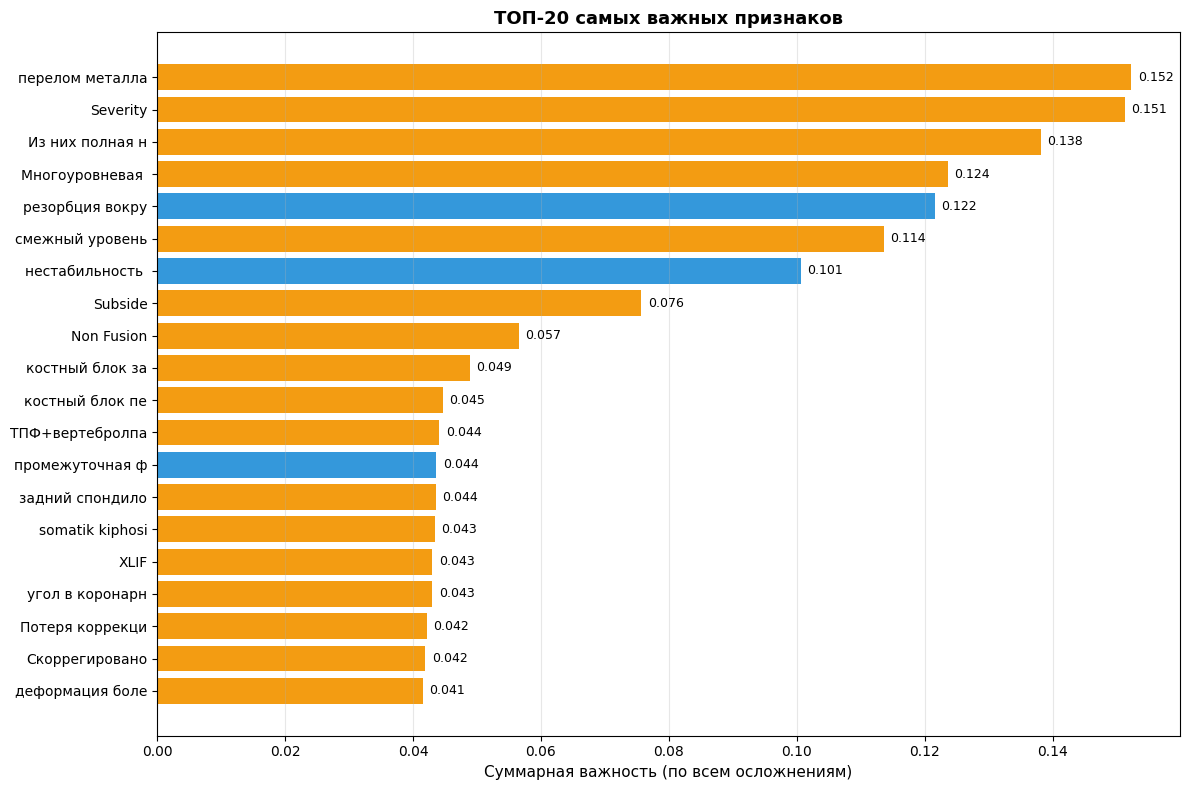


✅ Графики созданы!

КРАТКИЕ ВЫВОДЫ ИЗ ГРАФИКОВ:

1. 🎯 Самые важные признаки выделены цветом:
   - 🔴 Красный: Параметры стеноза
   - 🔵 Синий: Хирургические параметры (винты)
   - 🟢 Зеленый: Тип декомпрессии
   - 🟠 Оранжевый: Другие параметры

2. 📊 Обратите внимание на:
   - Распределение важности (равномерное или несколько ключевых признаков)
   - Общие важные признаки для обоих осложнений
   - Как быстро накапливается важность (кумулятивный график)

3. 🏥 Клиническая интерпретация:
   - Если топ-признаки это стенозы на нижних уровнях → это логично
   - Если топ-признаки это хирургические параметры → важность техники операции
   - Если важность равномерно распределена → много факторов влияет на риск



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

print("\n" + "="*60)
print("КОМПАКТНЫЕ ГРАФИКИ ВАЖНОСТИ ПРИЗНАКОВ")
print("="*60)

# Создадим функцию для красивых графиков
def plot_compact_feature_importance(gradient_importance, feature_columns, y_columns):
    """Создает компактные графики важности признаков"""

    fig = plt.figure(figsize=(15, 10))

    # 1. ТОП-10 ПРИЗНАКОВ ДЛЯ КАЖДОГО ОСЛОЖНЕНИЯ
    for idx, col in enumerate(y_columns):
        if idx in gradient_importance:
            ax = plt.subplot(2, 3, idx + 1)

            importance_df = gradient_importance[idx]
            top_features = importance_df.head(10)

            # Создаем красивые имена для графиков
            feature_names = []
            for feat in top_features['feature']:
                if isinstance(feat, str) and 'feature_' in feat:
                    try:
                        feat_idx = int(feat.split('_')[-1])
                        if feat_idx < len(feature_columns):
                            # Берем оригинальное имя и укорачиваем
                            orig_name = feature_columns[feat_idx]
                            # Выделяем ключевые слова
                            if 'стеноз' in orig_name and 'уровень' in orig_name:
                                # Извлекаем номер уровня
                                import re
                                match = re.search(r'[Ll]\d+', orig_name)
                                if match:
                                    short_name = f"Стеноз {match.group()}"
                                else:
                                    short_name = "Стеноз"
                            elif 'винт' in orig_name:
                                short_name = "Кол-во винтов"
                            elif 'декомпрессия' in orig_name:
                                short_name = "Тип декомпрессии"
                            elif 'нестабильность' in orig_name:
                                short_name = "Нестабильность"
                            elif 'высота' in orig_name:
                                short_name = "Высота тела"
                            elif 'плотность' in orig_name:
                                short_name = "Плотность кости"
                            else:
                                # Берем первые 20 символов
                                short_name = orig_name[:20] + "..."
                            feature_names.append(short_name)
                        else:
                            feature_names.append(f"Падинг {feat_idx}")
                    except:
                        feature_names.append(feat)
                else:
                    feature_names.append(str(feat)[:20] + "...")

            # Горизонтальные столбцы
            y_pos = np.arange(len(feature_names))
            bars = ax.barh(y_pos, top_features['importance_norm'].values)

            # Цвета в зависимости от типа признака
            for i, bar in enumerate(bars):
                feat_name = str(top_features.iloc[i]['feature'])
                if 'стеноз' in feat_name.lower() or 'уровень' in feat_name.lower():
                    bar.set_color('#e74c3c')  # Красный для стеноза
                elif 'винт' in feat_name.lower():
                    bar.set_color('#3498db')  # Синий для винтов
                elif 'декомпрессия' in feat_name.lower():
                    bar.set_color('#2ecc71')  # Зеленый для декомпрессии
                elif 'высота' in feat_name.lower():
                    bar.set_color('#9b59b6')  # Фиолетовый для анатомии
                else:
                    bar.set_color('#f39c12')  # Оранжевый для остального

            ax.set_yticks(y_pos)
            ax.set_yticklabels(feature_names, fontsize=9)
            ax.set_xlabel('Важность', fontsize=10)
            ax.set_title(f'{col[:25]}...', fontsize=11, fontweight='bold', pad=10)
            ax.invert_yaxis()
            ax.grid(True, alpha=0.3, axis='x')

            # Добавляем значения на столбцы
            for i, v in enumerate(top_features['importance_norm'].values):
                ax.text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=8)

    # 2. СРАВНЕНИЕ ВАЖНОСТИ МЕЖДУ ОСЛОЖНЕНИЯМИ (общие топ-признаки)
    ax = plt.subplot(2, 3, 3)

    # Находим общие топ-признаки
    common_features = {}
    if 0 in gradient_importance and 1 in gradient_importance:
        # Берем топ-15 из каждого
        top1 = set(gradient_importance[0].head(15)['feature'].values)
        top2 = set(gradient_importance[1].head(15)['feature'].values)
        common = top1.intersection(top2)

        # Собираем важности для общих признаков
        common_data = []
        for feat in common:
            imp1 = gradient_importance[0][gradient_importance[0]['feature'] == feat]['importance_norm'].values
            imp2 = gradient_importance[1][gradient_importance[1]['feature'] == feat]['importance_norm'].values

            if len(imp1) > 0 and len(imp2) > 0:
                # Создаем короткое имя
                if isinstance(feat, str) and 'feature_' in feat:
                    try:
                        feat_idx = int(feat.split('_')[-1])
                        if feat_idx < len(feature_columns):
                            orig_name = feature_columns[feat_idx]
                            # Упрощаем имя
                            if 'стеноз' in orig_name:
                                short_name = f"Стеноз_{feat_idx}"
                            elif 'винт' in orig_name:
                                short_name = "Винты"
                            elif 'декомпрессия' in orig_name:
                                short_name = "Декомпрессия"
                            else:
                                short_name = f"F{feat_idx}"
                        else:
                            short_name = f"P{feat_idx}"
                    except:
                        short_name = str(feat)[:10]
                else:
                    short_name = str(feat)[:10]

                common_data.append({
                    'feature': short_name,
                    'imp1': imp1[0],
                    'imp2': imp2[0]
                })

        # Сортируем по сумме важности
        common_data = sorted(common_data, key=lambda x: x['imp1'] + x['imp2'], reverse=True)[:10]

        if common_data:
            features = [d['feature'] for d in common_data]
            imp1_vals = [d['imp1'] for d in common_data]
            imp2_vals = [d['imp2'] for d in common_data]

            x = np.arange(len(features))
            width = 0.35

            bars1 = ax.bar(x - width/2, imp1_vals, width, label=y_columns[0][:15], color='#e74c3c', alpha=0.7)
            bars2 = ax.bar(x + width/2, imp2_vals, width, label=y_columns[1][:15], color='#3498db', alpha=0.7)

            ax.set_xlabel('Признаки', fontsize=10)
            ax.set_ylabel('Важность', fontsize=10)
            ax.set_title('Общие важные признаки', fontsize=11, fontweight='bold', pad=10)
            ax.set_xticks(x)
            ax.set_xticklabels(features, rotation=45, ha='right', fontsize=8)
            ax.legend(fontsize=9)
            ax.grid(True, alpha=0.3, axis='y')
        else:
            ax.text(0.5, 0.5, 'Нет общих\nтоп-признаков',
                   ha='center', va='center', fontsize=12, transform=ax.transAxes)
            ax.set_title('Общие важные признаки', fontsize=11, fontweight='bold')

    # 3. РАСПРЕДЕЛЕНИЕ ВАЖНОСТИ ПО ГРУППАМ ПРИЗНАКОВ
    ax = plt.subplot(2, 3, 6)

    # Группируем признаки по типам
    def categorize_feature(feat_name):
        """Определяет категорию признака"""
        if isinstance(feat_name, str):
            feat_str = str(feat_name).lower()
            if any(word in feat_str for word in ['стеноз', 'уровень']):
                return 'Стеноз/Уровни'
            elif any(word in feat_str for word in ['винт', 'декомпрессия', 'спондилодез']):
                return 'Хирургия'
            elif any(word in feat_str for word in ['высота', 'кифоз', 'плотность']):
                return 'Анатомия'
            elif any(word in feat_str for word in ['нестабильность', 'стабильность']):
                return 'Стабильность'
            elif any(word in feat_str for word in ['bmi', 'возраст', 'остеопороз']):
                return 'Демография'
            else:
                return 'Другие'
        return 'Неизвестно'

    # Собираем данные по всем осложнениям
    category_importance = {}
    for idx in gradient_importance.keys():
        importance_df = gradient_importance[idx]
        for _, row in importance_df.iterrows():
            category = categorize_feature(row['feature'])
            if category not in category_importance:
                category_importance[category] = []
            category_importance[category].append(row['importance_norm'])

    # Усредняем по категориям
    categories = []
    avg_importance = []
    for category, importances in category_importance.items():
        categories.append(category)
        avg_importance.append(np.mean(importances))

    # Сортируем
    sorted_idx = np.argsort(avg_importance)[::-1]
    categories = [categories[i] for i in sorted_idx]
    avg_importance = [avg_importance[i] for i in sorted_idx]

    # Визуализация
    colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f39c12', '#1abc9c']
    bars = ax.bar(categories, avg_importance, color=colors[:len(categories)])

    ax.set_xlabel('Категории признаков', fontsize=10)
    ax.set_ylabel('Средняя важность', fontsize=10)
    ax.set_title('Важность по категориям', fontsize=11, fontweight='bold', pad=10)
    ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=9)
    ax.grid(True, alpha=0.3, axis='y')

    # Добавляем значения
    for bar, val in zip(bars, avg_importance):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                f'{val:.3f}', ha='center', va='bottom', fontsize=8)

    # 4. КОРРЕЛЯЦИЯ ВАЖНОСТИ МЕЖДУ ОСЛОЖНЕНИЯМИ
    ax = plt.subplot(2, 3, 5)

    if 0 in gradient_importance and 1 in gradient_importance:
        # Создаем DataFrame для сравнения
        imp_df = gradient_importance[0][['feature', 'importance_norm']].merge(
            gradient_importance[1][['feature', 'importance_norm']],
            on='feature',
            suffixes=('_1', '_2')
        )

        # Точки с разным размером в зависимости от общей важности
        sizes = (imp_df['importance_norm_1'] + imp_df['importance_norm_2']) * 500

        scatter = ax.scatter(imp_df['importance_norm_1'],
                            imp_df['importance_norm_2'],
                            s=sizes, alpha=0.6, c='#2c3e50')

        # Линия y=x для сравнения
        max_val = max(imp_df['importance_norm_1'].max(),
                     imp_df['importance_norm_2'].max())
        ax.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, linewidth=1)

        # Подписываем топ-5 точек
        top_idx = (imp_df['importance_norm_1'] + imp_df['importance_norm_2']).nlargest(5).index
        for idx in top_idx:
            feat_name = imp_df.loc[idx, 'feature']
            if isinstance(feat_name, str) and 'feature_' in feat_name:
                try:
                    feat_idx = int(feat_name.split('_')[-1])
                    if feat_idx < len(feature_columns):
                        short_name = f"F{feat_idx}"
                    else:
                        short_name = f"P{feat_idx}"
                except:
                    short_name = "?"
            else:
                short_name = "?"

            ax.annotate(short_name,
                       (imp_df.loc[idx, 'importance_norm_1'],
                        imp_df.loc[idx, 'importance_norm_2']),
                       fontsize=8, alpha=0.8)

        ax.set_xlabel(f'Важность: {y_columns[0][:15]}...', fontsize=10)
        ax.set_ylabel(f'Важность: {y_columns[1][:15]}...', fontsize=10)
        ax.set_title('Корреляция важности', fontsize=11, fontweight='bold', pad=10)
        ax.grid(True, alpha=0.3)

        # Вычисляем и показываем корреляцию
        correlation = imp_df['importance_norm_1'].corr(imp_df['importance_norm_2'])
        ax.text(0.05, 0.95, f'r = {correlation:.3f}',
                transform=ax.transAxes, fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

    plt.suptitle('Анализ важности признаков LSTM модели',
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# 4. ДОПОЛНИТЕЛЬНО: ГРАФИК РАСПРЕДЕЛЕНИЯ ВАЖНОСТИ
def plot_importance_distribution(gradient_importance, y_columns):
    """График распределения важности признаков"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    for idx, col in enumerate(y_columns):
        if idx in gradient_importance:
            ax = axes[idx]
            importance_vals = gradient_importance[idx]['importance_norm'].values

            # Гистограмма
            ax.hist(importance_vals, bins=20, alpha=0.7, color='#3498db', edgecolor='black')

            # Линии для среднего и медианы
            mean_val = np.mean(importance_vals)
            median_val = np.median(importance_vals)

            ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.4f}')
            ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.4f}')

            ax.set_xlabel('Важность признака', fontsize=10)
            ax.set_ylabel('Частота', fontsize=10)
            ax.set_title(f'Распределение важности: {col[:20]}...', fontsize=11, fontweight='bold')
            ax.legend(fontsize=9)
            ax.grid(True, alpha=0.3)

    plt.suptitle('Распределение важности признаков', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()

# 5. ГРАФИК СУММАРНОЙ ВАЖНОСТИ ТОП-ПРИЗНАКОВ
def plot_cumulative_importance(gradient_importance, y_columns):
    """График кумулятивной важности"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    for idx, col in enumerate(y_columns):
        if idx in gradient_importance:
            ax = axes[idx]
            importance_df = gradient_importance[idx].sort_values('importance_norm', ascending=False)

            # Кумулятивная сумма
            cumulative = np.cumsum(importance_df['importance_norm'].values)

            # Сколько признаков нужно для 80%, 90% важности
            n_80 = np.argmax(cumulative >= 0.8) + 1
            n_90 = np.argmax(cumulative >= 0.9) + 1

            ax.plot(range(1, len(cumulative) + 1), cumulative, 'b-', linewidth=2)
            ax.axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label=f'80% ({n_80} признаков)')
            ax.axhline(y=0.9, color='green', linestyle='--', alpha=0.7, label=f'90% ({n_90} признаков)')
            ax.axvline(x=n_80, color='red', linestyle=':', alpha=0.5)
            ax.axvline(x=n_90, color='green', linestyle=':', alpha=0.5)

            ax.fill_between(range(1, len(cumulative) + 1), 0, cumulative, alpha=0.3)

            ax.set_xlabel('Количество признаков (отсортировано)', fontsize=10)
            ax.set_ylabel('Кумулятивная важность', fontsize=10)
            ax.set_title(f'Кумулятивная важность: {col[:20]}...', fontsize=11, fontweight='bold')
            ax.legend(fontsize=9)
            ax.grid(True, alpha=0.3)
            ax.set_xlim([0, min(50, len(cumulative))])

    plt.suptitle('Кумулятивная важность признаков', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()

# ЗАПУСК ВИЗУАЛИЗАЦИИ
print("\nГенерируем графики...")

# Используем правильные данные (если есть) или исходные
if 'correct_gradient_importance' in locals():
    print("Используем исправленные данные важности...")
    data_to_plot = correct_gradient_importance
else:
    print("Используем исходные данные важности...")
    data_to_plot = gradient_importance

# 1. Основные компактные графики
plot_compact_feature_importance(data_to_plot, feature_columns, y.columns)

# 2. Распределение важности
plot_importance_distribution(data_to_plot, y.columns)

# 3. Кумулятивная важность
plot_cumulative_importance(data_to_plot, y.columns)

# 6. ПРОСТОЙ ГРАФИК ТОП-20 ПРИЗНАКОВ ВСЕ ВМЕСТЕ
print("\n" + "="*60)
print("ПРОСТОЙ ГРАФИК: ТОП-20 САМЫХ ВАЖНЫХ ПРИЗНАКОВ")
print("="*60)

fig, ax = plt.subplots(figsize=(12, 8))

# Собираем суммарную важность по всем осложнениям
all_features = {}
for idx in data_to_plot.keys():
    importance_df = data_to_plot[idx]
    for _, row in importance_df.iterrows():
        feat = row['feature']
        imp = row['importance_norm']
        if feat in all_features:
            all_features[feat] += imp
        else:
            all_features[feat] = imp

# Сортируем и берем топ-20
sorted_features = sorted(all_features.items(), key=lambda x: x[1], reverse=True)[:20]

# Создаем красивые имена
feature_names = []
importance_vals = []
colors = []

for feat, imp in sorted_features:
    # Создаем короткое имя
    if isinstance(feat, str) and 'feature_' in feat:
        try:
            idx = int(feat.split('_')[-1])
            if idx < len(feature_columns):
                orig_name = feature_columns[idx]
                # Очень короткое имя
                if 'стеноз' in orig_name:
                    if 'L5' in orig_name or '_6' in orig_name:
                        short_name = "Стеноз L5-S1"
                    elif 'L4' in orig_name or '_5' in orig_name:
                        short_name = "Стеноз L4-L5"
                    else:
                        short_name = f"Стеноз_{idx}"
                elif 'винт' in orig_name:
                    short_name = "Кол-во винтов"
                elif 'декомпрессия' in orig_name:
                    short_name = "Декомпрессия"
                elif 'нестабильность' in orig_name:
                    short_name = "Нестабильность"
                elif 'высота' in orig_name:
                    short_name = "Высота тела"
                else:
                    short_name = f"Признак_{idx}"
            else:
                short_name = f"Падинг_{idx}"
        except:
            short_name = str(feat)[:15]
    else:
        short_name = str(feat)[:15]

    feature_names.append(short_name)
    importance_vals.append(imp)

    # Цвет в зависимости от типа
    feat_str = str(feat).lower()
    if 'стеноз' in feat_str:
        colors.append('#e74c3c')
    elif 'винт' in feat_str:
        colors.append('#3498db')
    elif 'декомпрессия' in feat_str:
        colors.append('#2ecc71')
    else:
        colors.append('#f39c12')

# Горизонтальный график
y_pos = np.arange(len(feature_names))
bars = ax.barh(y_pos, importance_vals, color=colors)

ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names, fontsize=10)
ax.set_xlabel('Суммарная важность (по всем осложнениям)', fontsize=11)
ax.set_title('ТОП-20 самых важных признаков', fontsize=13, fontweight='bold')
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')

# Добавляем значения
for bar, val in zip(bars, importance_vals):
    ax.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
            f'{val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n✅ Графики созданы!")
print("\n" + "="*60)
print("КРАТКИЕ ВЫВОДЫ ИЗ ГРАФИКОВ:")
print("="*60)

print("""
1. 🎯 Самые важные признаки выделены цветом:
   - 🔴 Красный: Параметры стеноза
   - 🔵 Синий: Хирургические параметры (винты)
   - 🟢 Зеленый: Тип декомпрессии
   - 🟠 Оранжевый: Другие параметры

2. 📊 Обратите внимание на:
   - Распределение важности (равномерное или несколько ключевых признаков)
   - Общие важные признаки для обоих осложнений
   - Как быстро накапливается важность (кумулятивный график)

3. 🏥 Клиническая интерпретация:
   - Если топ-признаки это стенозы на нижних уровнях → это логично
   - Если топ-признаки это хирургические параметры → важность техники операции
   - Если важность равномерно распределена → много факторов влияет на риск
""")
